In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [5]:
# Create an output directory to save results
output_dir = r"C:\Users\M. Faizan\Desktop\SE\6th\Saved"
os.makedirs(output_dir, exist_ok=True)

# Load dataset
file_path = r"C:\Users\M. Faizan\Desktop\SE\6th\Saved/cleaned_and_featured_data.csv"
df = pd.read_csv(file_path)

Columns in dataset: Index(['datetime', 'subba', 'subba-name', 'parent', 'parent-name',
       'electricity_demand', 'value-units', 'temperature_2m', 'hour', 'day',
       'month', 'year', 'day_of_week', 'is_weekend', 'season'],
      dtype='object')


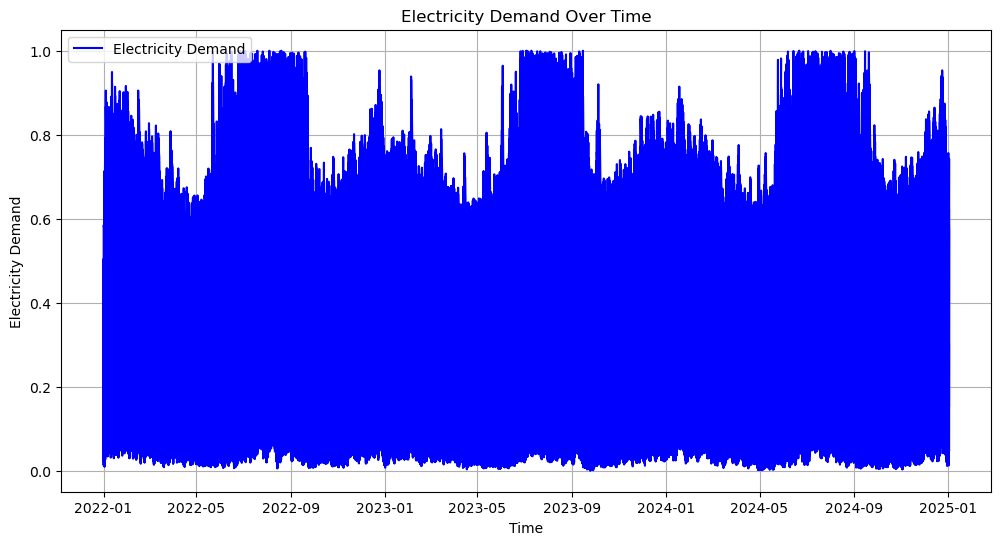

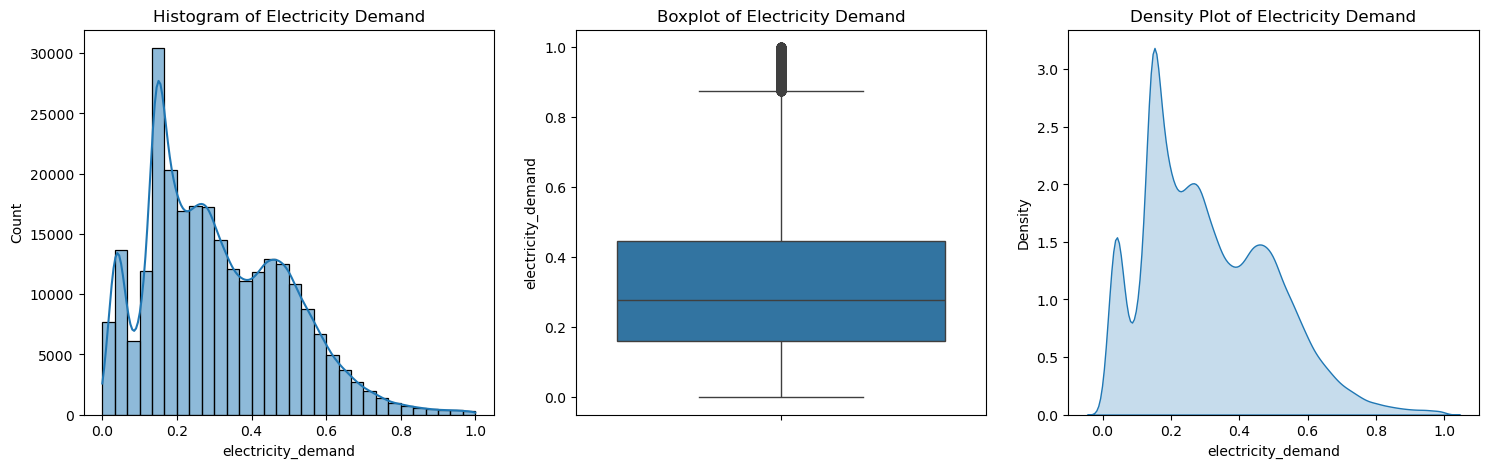

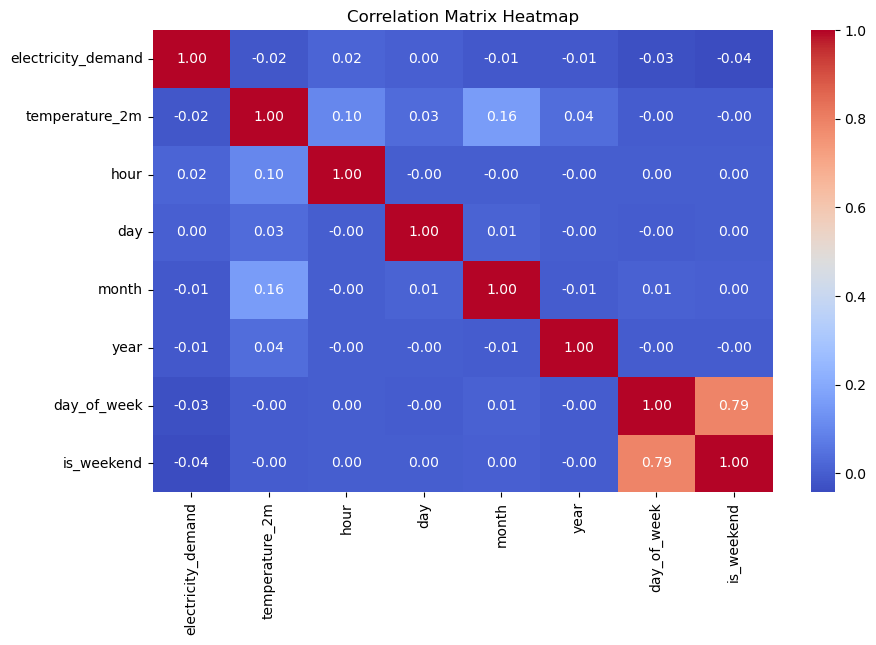

C:\Users\M. Faizan\AppData\Local\Temp\ipykernel_18528\2657385173.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["electricity_demand"].ffill(inplace=True)  # Fixed FutureWarning
C:\Users\M. Faizan\AppData\Local\Temp\ipykernel_18528\2657385173.py:68: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df["electricity_demand"].resample("H").mean().dropna()


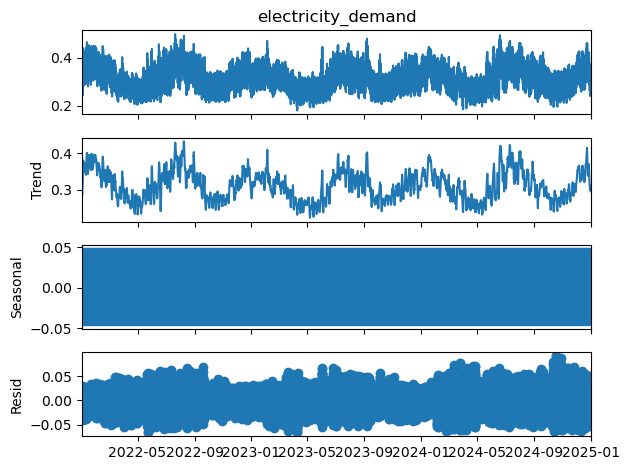

EDA Completed. All results are saved in: C:\Users\M. Faizan\Desktop\SE\6th\Saved


In [7]:
# Print column names for debugging
print("Columns in dataset:", df.columns)

# Ensure "datetime" is in datetime format
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

# =============================================
# 1. Statistical Summary (Only Numeric Columns)
# =============================================
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
summary = numeric_df.describe().T
summary["skewness"] = numeric_df.skew()
summary["kurtosis"] = numeric_df.kurtosis()
summary.to_csv(os.path.join(output_dir, "statistical_summary.csv"))

# =========================
# 2. Time Series Analysis
# =========================
plt.figure(figsize=(12, 6))
plt.plot(df["datetime"], df["electricity_demand"], label="Electricity Demand", color="blue")
plt.xlabel("Time")
plt.ylabel("Electricity Demand")
plt.title("Electricity Demand Over Time")
plt.legend()
plt.grid()
plt.savefig(os.path.join(output_dir, "time_series_plot.png"))
plt.show()

# =========================
# 3. Univariate Analysis
# =========================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
sns.histplot(df["electricity_demand"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Histogram of Electricity Demand")

# Boxplot
sns.boxplot(y=df["electricity_demand"], ax=axes[1])
axes[1].set_title("Boxplot of Electricity Demand")

# Density Plot
sns.kdeplot(df["electricity_demand"], fill=True, ax=axes[2])  # Fixed seaborn warning
axes[2].set_title("Density Plot of Electricity Demand")

plt.savefig(os.path.join(output_dir, "univariate_analysis.png"))
plt.show()

# =========================
# 4. Correlation Analysis
# =========================
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.savefig(os.path.join(output_dir, "correlation_heatmap.png"))
plt.show()

# ================================
# 5. Advanced Time Series Analysis
# ================================
df.set_index("datetime", inplace=True)

# Handle missing values before decomposition
df["electricity_demand"].ffill(inplace=True)  # Fixed FutureWarning

# Resampling to reduce memory usage in ADF test
df_resampled = df["electricity_demand"].resample("H").mean().dropna()

# Time Series Decomposition
decomposition = seasonal_decompose(df_resampled, model="additive", period=24)
decomposition.plot()
plt.savefig(os.path.join(output_dir, "time_series_decomposition.png"))
plt.show()

# Stationarity Test (ADF Test)
adf_test = adfuller(df_resampled)
adf_results = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4]
}

# Save ADF results
with open(os.path.join(output_dir, "adf_test_results.txt"), "w") as f:
    f.write(str(adf_results))

print("EDA Completed. All results are saved in:", output_dir)